In [16]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting
import numpy as np

In [2]:
# Load data from Excel files
cancer_data = pd.read_excel("Cancer Data by Country with UID 1 (4).xlsx")
other_data = pd.read_excel("Other Data with UID 1 (2).xlsx")

In [3]:
# Define a function to clip outliers using the 1.5*IQR method
def clip_15iqr(series: pd.Series):
    # Calculate the first quartile (25th percentile) of the data
    q1 = series.quantile(0.25)
    # Calculate the third quartile (75th percentile) of the data
    q3 = series.quantile(0.75)
    # Calculate the interquartile range (IQR) of the data
    iqr = q3 - q1
    # Clip outliers below q1 - 1.5*IQR and above q3 + 1.5*IQR
    return series.clip(q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [4]:
cancer_data

,RecordID,Gender,Continent,Country,Year,Lung Cancer,Liver Cancer,Stomach Cancer
0,1142,Female,Americas,D#ominic_an R7epublic,1992,148.0,105.00,113.00
1,3289,Female,Americas,Arg#_7entina,2008,2840.0,784.00,1670.00
2,310,Female,Europe,Austria,2004,1370.0,301.00,764.00
3,1403,Female,Africa,Burundi#_7,1994,43.4,109.00,153.00
4,43,Female,Europe,Ukraine,1991,5010.0,720.00,9030.00
...,...,...,...,...,...,...,...,...
5999,6000,men,Americas,Urugu#_ay7,2008,1050.0,71.80,447.00
6000,6001,men,Asia,Uzb#_7ekistan,2008,1170.0,544.00,1340.00
6001,6002,men,Oceania,V#_anuatu7,2008,14.3,4.98,7.43
6002,6003,men,Asia,Y#_7emen,2008,689.0,343.00,406.00


In [5]:
other_data

,RecordID,Gender,Continent,Country,Year,BMI,Blood Pressure,Cholesterol,Population,Population Growth
0,1142,Female,Americas,D#ominic_an R7epublic,1992,24.2,128,4.57,3683.372,1.934371
1,3289,Female,Americas,Arg#_7entina,2008,27.5,119,5.07,20589.210,0.971383
2,310,Female,Europe,Austria,2004,24.9,125,5.33,4223.711,0.481698
3,1403,Female,Africa,Burundi#_7,1994,20.4,130,4.27,3016.182,1.816209
4,43,Female,Europe,Ukraine,1991,26.3,134,5.38,27506.697,-0.084882
...,...,...,...,...,...,...,...,...,...,...
5999,6000,men,Americas,Urugu#_ay7,2008,26.4,132,4.81,1609.858,0.237353
6000,6001,men,Asia,Uzb#_7ekistan,2008,25.3,128,4.26,13732.384,1.575846
6001,6002,men,Oceania,V#_anuatu7,2008,26.8,134,4.61,114.273,2.277853
6002,6003,men,Asia,Y#_7emen,2008,24.4,129,4.45,11034.174,2.868498


In [6]:
# Prepare cancer data
cancer_data_prepared = cancer_data.copy()  # Create a copy of the original cancer data to avoid modifying it directly
cancer_data_prepared = cancer_data_prepared.set_index('RecordID')  # Set the 'RecordID' column as the index of the DataFrame
cancer_data_prepared.replace({'Gender': 'Female'}, 'women', inplace=True)  # Replace 'Female' with 'women' in the 'Gender' column
cancer_data_prepared.replace({'Country': '[#_7]'}, '', regex=True, inplace=True)  # Remove '[#_7]' from 'Country' names using regular expressions
# Clip outliers for specific cancer types using the previously defined function
cancer_data_prepared['Lung Cancer'] = clip_15iqr(cancer_data_prepared['Lung Cancer'])
cancer_data_prepared['Liver Cancer'] = clip_15iqr(cancer_data_prepared['Liver Cancer'])
cancer_data_prepared['Stomach Cancer'] = clip_15iqr(cancer_data_prepared['Stomach Cancer'])

In [7]:
cancer_data_prepared

,Gender,Continent,Country,Year,Lung Cancer,Liver Cancer,Stomach Cancer
RecordID,,,,,,,
1142,women,Americas,Dominican Republic,1992,148.0000,105.00,113.000
3289,women,Americas,Argentina,2008,2840.0000,784.00,1670.000
310,women,Europe,Austria,2004,1370.0000,301.00,764.000
1403,women,Africa,Burundi,1994,43.4000,109.00,153.000
43,women,Europe,Ukraine,1991,3101.1625,720.00,2103.625
...,...,...,...,...,...,...,...
6000,men,Americas,Uruguay,2008,1050.0000,71.80,447.000
6001,men,Asia,Uzbekistan,2008,1170.0000,544.00,1340.000
6002,men,Oceania,Vanuatu,2008,14.3000,4.98,7.430


In [8]:
# Prepare other data
other_data_prepared = other_data.copy()  # Create a copy of the original other data to avoid modifying it directly
other_data_prepared.replace({'Gender': 'Female'}, 'women', inplace=True)  # Replace 'Female' with 'women' in the 'Gender' column
other_data_prepared.replace({'Country': '[#_7]'}, '', regex=True, inplace=True)  # Remove '[#_7]' from 'Country' names using regular expressions
other_data_prepared = other_data_prepared.set_index('RecordID')  # Set the 'RecordID' column as the index of the DataFrame
# Clip outliers for BMI, Blood Pressure, Cholesterol, Population, and Population Growth using the previously defined function
other_data_prepared['BMI'] = clip_15iqr(other_data_prepared['BMI'])
other_data_prepared['Blood Pressure'] = clip_15iqr(other_data_prepared['Blood Pressure'])
other_data_prepared['Cholesterol'] = clip_15iqr(other_data_prepared['Cholesterol'])
other_data_prepared['Population'] = clip_15iqr(other_data_prepared['Population'])
other_data_prepared['Population Growth'] = clip_15iqr(other_data_prepared['Population Growth'])

In [9]:
other_data_prepared

,Gender,Continent,Country,Year,BMI,Blood Pressure,Cholesterol,Population,Population Growth
RecordID,,,,,,,,,
1142,women,Americas,Dominican Republic,1992,24.2,128,4.57,3683.372000,1.934371
3289,women,Americas,Argentina,2008,27.5,119,5.07,20589.210000,0.971383
310,women,Europe,Austria,2004,24.9,125,5.33,4223.711000,0.481698
1403,women,Africa,Burundi,1994,20.4,130,4.27,3016.182000,1.816209
43,women,Europe,Ukraine,1991,26.3,134,5.38,23381.310125,-0.084882
...,...,...,...,...,...,...,...,...,...
6000,men,Americas,Uruguay,2008,26.4,132,4.81,1609.858000,0.237353
6001,men,Asia,Uzbekistan,2008,25.3,128,4.26,13732.384000,1.575846
6002,men,Oceania,Vanuatu,2008,26.8,134,4.61,114.273000,2.277853


3. What is the average BMI in Poland in 2008?

In [10]:
# Calculating the average BMI in Poland for the year 2008
other_data_prepared[other_data_prepared['Country'] == 'Poland'][other_data_prepared['Year'] == 2008]['BMI'].mean()

C:\Users\Blayence\AppData\Local\Temp\ipykernel_15424\840852100.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_data_prepared[other_data_prepared['Country'] == 'Poland'][other_data_prepared['Year'] == 2008]['BMI'].mean()


26.299999999999997

4. From 1990 to 2008, which continent has the highest average cancer rate (sum of all cancer patient /
population)?

In [11]:
# Set the display format for floating-point numbers to show up to 8 decimal places
pd.set_option('display.float_format', lambda x: '%.8f' % x)

Europe


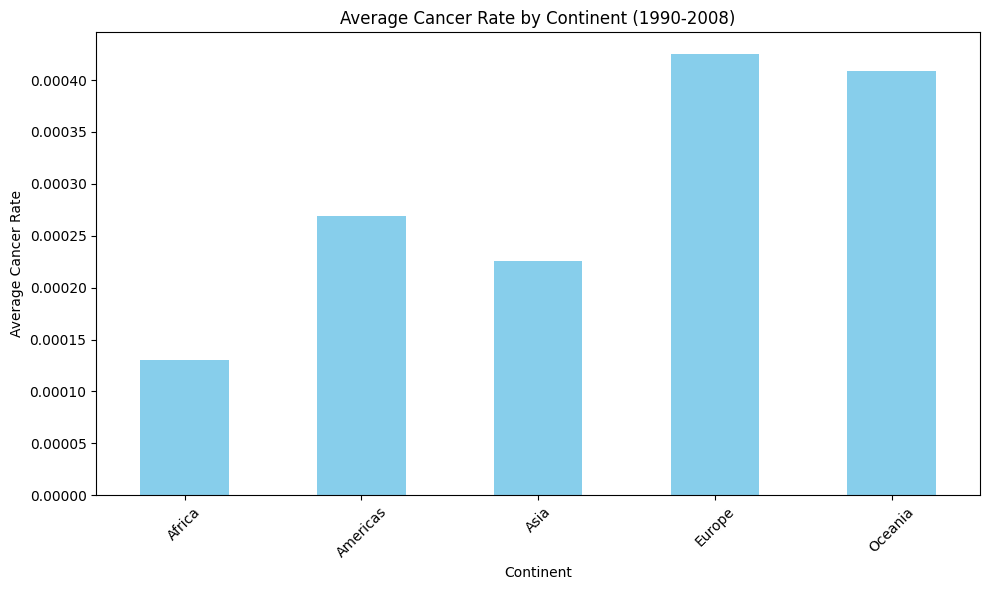

In [12]:
# Calculate the total population for each continent and year, then multiply by 1000
continent_populations = other_data_prepared.groupby(['Continent', 'Year'])['Population'].sum() * 1000

# Calculate the total number of cancer cases for each continent and year by summing cases of Lung Cancer, Liver Cancer, and Stomach Cancer
continent_total_cancer = cancer_data_prepared.groupby(['Continent', 'Year']) \
    [['Lung Cancer', 'Liver Cancer', 'Stomach Cancer']] \
        .sum() \
        .sum(axis=1)

# Calculate the percentage of cancer cases relative to the population for each continent and year
cancer_percentages_by_year = continent_total_cancer / continent_populations

# Calculate the mean cancer percentage for each continent
cancer_percentages = cancer_percentages_by_year.groupby('Continent').mean()

# Print the continent with the highest average cancer rate
print(cancer_percentages.idxmax())

# Plotting

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the average cancer rate for each continent as a bar graph, with sky blue color
cancer_percentages.plot(kind='bar', color='skyblue')

# Setting up the title and labels for the graph
plt.title('Average Cancer Rate by Continent (1990-2008)')
plt.xlabel('Continent')
plt.ylabel('Average Cancer Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

5. Considering that 120-140 is healthy blood pressure, which countries’ average blood pressure is
exceeding that standard in 2008? 

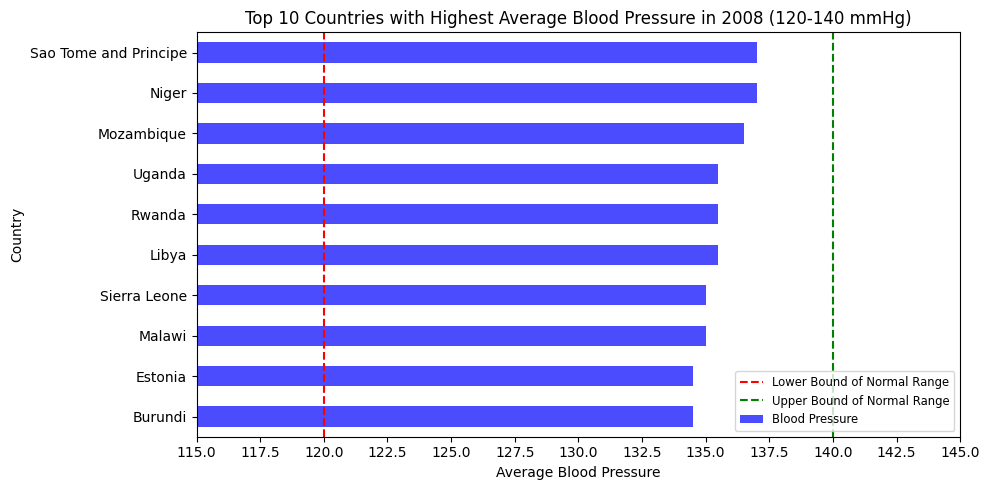

In [25]:
# Apply filtering based on the condition
avg_blood_pressures_2008 = other_data_prepared[other_data_prepared['Year'] == 2008].groupby('Country')['Blood Pressure'].mean()
avg_blood_pressures_120_140 = avg_blood_pressures_2008[(avg_blood_pressures_2008 > 120) & (avg_blood_pressures_2008 < 140)]
# Filter the top 10 countries based on blood pressure
top_10_countries = avg_blood_pressures_120_140.nlargest(10)

# Create a plot for top 10 countries with adjusted blood pressure range and step size
plt.figure(figsize=(10, len(top_10_countries) * 0.5))
top_10_countries.sort_values().plot(kind='barh', color='blue', alpha=0.7)
plt.title('Top 10 Countries with Highest Average Blood Pressure in 2008 (120-140 mmHg)')
plt.xlabel('Average Blood Pressure')
plt.ylabel('Country')
plt.xlim(115, 145)  # Adjusting x-axis limits
plt.xticks(np.arange(115, 146, 2.5))  # Setting custom ticks with a step size of 2.5
plt.axvline(x=120, color='red', linestyle='--', label='Lower Bound of Normal Range')
plt.axvline(x=140, color='green', linestyle='--', label='Upper Bound of Normal Range')
plt.legend(loc='lower right', fontsize='small')  # Moving the legend to the lower right corner with smaller fontsize
plt.tight_layout()
plt.show()

In [26]:
# Save the prepared cancer data to an Excel file for further analysis
cancer_data_prepared.to_excel('cancer_data_prepared.xlsx')

In [27]:
# Save the prepared other data to an Excel file for further analysis
other_data_prepared.to_excel('other_data_prepared.xlsx')

In [28]:
# Perform an inner join between two prepared datasets, other_data_prepared and cancer_data_prepared, and save the result to an Excel file named 'data_joined.xlsx'.
other_data_prepared.merge(cancer_data_prepared).to_excel('data_joined.xlsx')